# Squid Game Sentiment Analysis

In [2]:
! pip install wordcloud


  Using cached wordcloud-1.8.1-cp38-cp38-win_amd64.whl (155 kB)


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


# 1. Reading Dataset

In [5]:
sqgame = pd.read_csv("tweets_v8.csv")
sqgame.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False


# 2. Checking Null Values

In [6]:
sqgame.isnull().sum()

user_name               4
user_location       23870
user_description     5211
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
source                  0
is_retweet              0
dtype: int64

user_location and user_description contains null value 

In [7]:
data = sqgame.drop(columns=["user_location","user_description"],axis=1)
data

,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2,marcie,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...
80014,Sale X Low,2021-04-03 20:49:35+00:00,12,49,7,False,2021-10-28 13:46:26+00:00,Yes Yes Yes\n\n@ArianaGrande\n#Squidgame\n htt...,SocialRabbit Plugin,False
80015,RevAAA,2010-11-24 21:48:53+00:00,6907,0,0,False,2021-10-28 13:45:38+00:00,SQUID GAME was reviewed on RevAAA #squidgame \...,Twitter for iPhone,False
80016,Omo K-Pop News,2021-09-22 12:01:24+00:00,152,807,593,False,2021-10-28 13:45:00+00:00,Back &amp; Forth Between ‘Squid Game’ Creator ...,Twitter Web App,False
80017,🎃Pumpkin💀Queen 🕸,2009-02-19 17:09:28+00:00,8048,8822,68980,False,2021-10-28 13:44:57+00:00,So what sort of games do you think they'll pla...,Twitter for Android,False


In [8]:
data.isnull().sum()

user_name          4
user_created       0
user_followers     0
user_friends       0
user_favourites    0
user_verified      0
date               0
text               0
source             0
is_retweet         0
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.head()

,user_name,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2,marcie,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False


The “text” column in the dataset contains the opinions of the users of Twitter about the squid game, as these are social media opinions, so this column needs to be prepared before any analysis

In [13]:
data.shape

(80015, 10)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80015 entries, 0 to 80018
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_name        80015 non-null  object
 1   user_created     80015 non-null  object
 2   user_followers   80015 non-null  int64 
 3   user_friends     80015 non-null  int64 
 4   user_favourites  80015 non-null  int64 
 5   user_verified    80015 non-null  bool  
 6   date             80015 non-null  object
 7   text             80015 non-null  object
 8   source           80015 non-null  object
 9   is_retweet       80015 non-null  bool  
dtypes: bool(2), int64(3), object(5)
memory usage: 5.6+ MB


In [17]:
data.columns

Index(['user_name', 'user_created', 'user_followers', 'user_friends',
       'user_favourites', 'user_verified', 'date', 'text', 'source',
       'is_retweet'],
      dtype='object')

 # 3. TEXT PREPROCESSING

In [24]:
import nltk
import re
from nltk.corpus import stopwords
import string


In [21]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
stemmer = nltk.SnowballStemmer('english')
stemmer


In [27]:
stopword = set(stopwords.words("english"))              

In [28]:
stopword

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

# write a function to clean text

In [34]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

In [30]:
data['text'] 


0        When life hits and the same time poverty strik...
1        That marble episode of #SquidGame  ruined me. 😭😭😭
2                                          #Squidgame time
3        //Blood on 1st slide\nI'm joining the squidgam...
4        The two first games, players were killed by th...
                               ...                        
80014    Yes Yes Yes\n\n@ArianaGrande\n#Squidgame\n htt...
80015    SQUID GAME was reviewed on RevAAA #squidgame \...
80016    Back &amp; Forth Between ‘Squid Game’ Creator ...
80017    So what sort of games do you think they'll pla...
80018    @venancio_taylor @tracklist cala a boca swifte...
Name: text, Length: 80015, dtype: object

let’s take a look at the most used words in the Squid Game opinions using a word cloud. A word cloud is a data visualization tool that displays the most used words in a larger size. Here is how you can visualize the word cloud of the text column:

In [38]:
text = " ".join(i for i in data.text)
#text


In [41]:
stopwords =set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
wordcloud

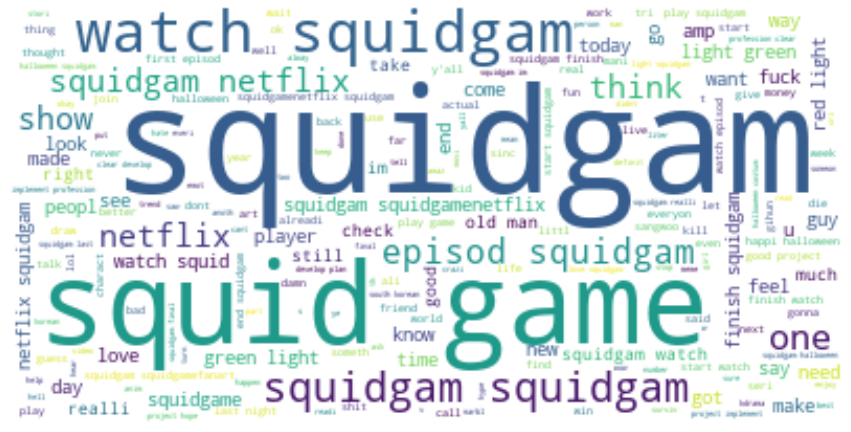

In [42]:

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

let’s move to the task of Squid Game sentiment analysis. Here I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the text column

In [43]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]
data = data[["text", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


                                                text  Positive  Negative  \
0  life hit time poverti strike yougong yoo  let ...     0.173     0.108   
1                    marbl episod squidgam  ruin 😭😭😭     0.000     0.487   
2                                      squidgam time     0.000     0.000   
3  blood  slideim join squidgam thing im alreadi ...     0.142     0.277   
4  two first game player kill mask guy  bloodi ni...     0.000     0.461   

   Neutral  
0    0.719  
1    0.513  
2    1.000  
3    0.581  
4    0.539  


# let’s calculate how most people think about the Squid Game:


In [ ]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

In [45]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  10604.55899999976
Negative:  5171.334000000031
Neutral:  64233.11800000302


 total of negatives is much lower than that of Positive, so we can say that most of the opinions on the Squid Game are positive.

# summary

The Squid Game is currently one of the most trending shows on Netflix. One of the reasons behind this is the reviews and opinions of viewers on social media
